# Lab 7

> Dijkstra's Algorithm,

In this lab we will implement dijkstra's shortest path algorithm as described in Fig 4.8.
Dijkstra's algorithm is a n efficient method for finding the shortest path between two nodes in a weighted graph.
It can be used in various applications, such as navigation systems, network routing and transportation planing.

We will use the HeapDict priority queue implementation to manage the nodes during execution of the algorithm.
This datastructure works like a dictionary, allowing both insert and decrease key operations by simply setting the dictionary key to a given value.
It also supports the delete min operation via popitem.


# HeapDict

HeapDict is a priority queue implementation that supports the following operations:
- insert(key, value): inserts a new key-value pair into the priority queue
-

In [32]:
import heapq
from collections import defaultdict
from itertools import count

tombstone = "<removed>"
counter = count()


class HeapDict:
    def __init__(self):
        self.heap = []
        self.entry_finder = {}

    def __setitem__(self, key, value):
        if key in self.entry_finder:
            self.remove(key)
        priority = value
        entry = [priority, next(counter), key]
        self.entry_finder[key] = entry
        heapq.heappush(self.heap, entry)

    def __getitem__(self, item):
        return self.entry_finder[item][0]

    def __delitem__(self, key):
        entry = self.entry_finder.pop(key)
        entry[-1] = tombstone

    def remove(self, key):
        del self[key]

    def popitem(self):
        while self.heap:
            priority, _, key = heapq.heappop(self.heap)
            if key != tombstone:
                del self.entry_finder[key]
                return key, priority
        raise KeyError("HeapDict is empty")

    def __bool__(self):
        return bool(self.entry_finder)

    def __len__(self):
        return len(self.entry_finder)


# Keep the rest of the code the same


# Dijkstra's Algorithm


In [33]:
def dijkstra(graph, weights, start_vertex):
    dist = defaultdict(lambda: float('inf'))
    prev = defaultdict(lambda: None)
    dist[start_vertex] = 0

    pq = HeapDict()
    for vertex in graph:
        pq[vertex] = dist[vertex]

    while pq:
        current_vertex, current_dist = pq.popitem()

        for neighbor in graph[current_vertex]:
            edge_key = (current_vertex, neighbor)
            if edge_key not in weights:
                continue

            new_dist = current_dist + weights[edge_key]
            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                prev[neighbor] = current_vertex
                pq[neighbor] = new_dist

    # Reconstruct paths
    paths = {}
    for vertex in graph:
        path = []
        current_vertex = vertex
        while current_vertex is not None:
            path.append(current_vertex)
            current_vertex = prev[current_vertex]
        paths[vertex] = path[::-1]

    return dist, paths


In [34]:
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D', 'F'],
    'D': ['E'],
    'E': [],
    'F': ['E']
}

weights = {
    ('A', 'B'): 2,
    ('A', 'C'): 4,
    ('B', 'D'): 3,
    ('C', 'D'): 1,
    ('C', 'F'): 5,
    ('D', 'E'): 4,
    ('F', 'E'): 1
}

from pprint import pprint
shortest_path_lengths, shortest_paths = dijkstra(graph, weights, 'A')
print("Shortest path lengths:")
pprint(dict(shortest_path_lengths))
print("Shortest paths:")
pprint(shortest_paths)

Shortest path lengths:
{'A': 0, 'B': 2, 'C': 4, 'D': 5, 'E': 9, 'F': 9}
Shortest paths:
{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'B', 'D'],
 'E': ['A', 'B', 'D', 'E'],
 'F': ['A', 'C', 'F']}


In [35]:
!pip install networkx

In [70]:
import networkx as nx
import random

# Generate random graph
n_nodes = 100
edge_prob = 0.02
random_graph = nx.fast_gnp_random_graph(n_nodes, edge_prob, directed=True)

# Weight constraints
min_weight = 1
max_weight = 10
random_weights = {(u, v): random.randint(min_weight, max_weight) for u, v in random_graph.edges}

# Convert Graph to Dictionary
graph_dict = {node: list(adj_nodes) for node, adj_nodes in random_graph.adjacency()}

In [71]:
start_vertx = 0
shortest_path_lengths, shortest_paths = dijkstra(graph_dict, random_weights, start_vertx)

print("Shortest path lengths for the random graph:")
pprint(dict(shortest_path_lengths))
print("Shortest paths for the random graph:")
pprint(shortest_paths)

Shortest path lengths for the random graph:
{0: 0,
 1: inf,
 2: inf,
 3: inf,
 4: 33,
 5: inf,
 6: 13,
 7: 45,
 8: 25,
 9: 47,
 10: 37,
 11: 16,
 12: 6,
 13: inf,
 14: inf,
 15: inf,
 16: 48,
 17: 6,
 18: 46,
 19: inf,
 20: 26,
 21: 10,
 22: 47,
 23: 26,
 24: inf,
 25: 44,
 26: inf,
 27: 14,
 28: 36,
 29: 19,
 30: inf,
 31: 46,
 32: inf,
 33: 45,
 34: inf,
 35: 36,
 36: 13,
 37: 21,
 38: 29,
 39: 27,
 40: inf,
 41: 9,
 42: 18,
 43: 39,
 44: 9,
 45: 26,
 46: 35,
 47: 37,
 48: inf,
 49: 28,
 50: 20,
 51: 38,
 52: 6,
 53: inf,
 54: 7,
 55: 27,
 56: inf,
 57: inf,
 58: 30,
 59: inf,
 60: 15,
 61: 36,
 62: 23,
 63: 19,
 64: 24,
 65: 8,
 66: inf,
 67: 28,
 68: inf,
 69: 45,
 70: 20,
 71: 20,
 72: 39,
 73: 49,
 74: 29,
 75: 31,
 76: inf,
 77: 25,
 78: inf,
 79: 18,
 80: 10,
 81: 23,
 82: 22,
 83: inf,
 84: 37,
 85: 29,
 86: 33,
 87: 9,
 88: inf,
 89: 32,
 90: 10,
 91: 15,
 92: 18,
 93: inf,
 94: 53,
 95: inf,
 96: 31,
 97: 28,
 98: inf,
 99: inf}
Shortest paths for the random graph:
{0: [0],


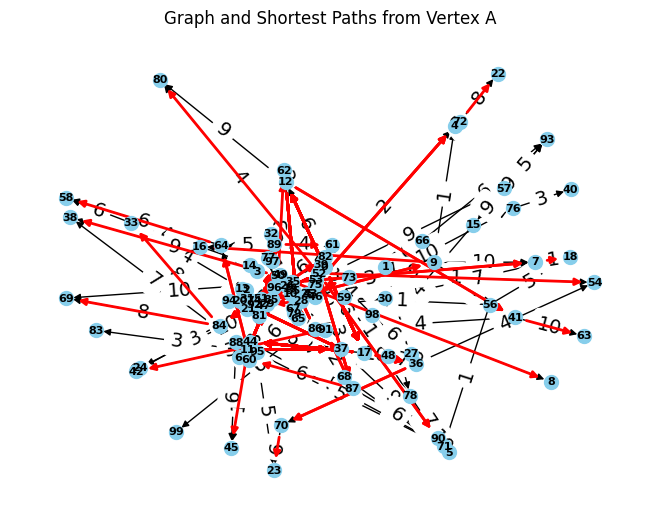

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
start_vertex = 'A'

def visualize_graph_and_shortest_path(graph, weights, shortest_paths, start_vertx):
    G = nx.DiGraph()

    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge, weight=weights[(node, edge)])

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=8, font_weight='bold')
    edge_labels = {(u, v): weights[(u, v)] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    for path in shortest_paths.values():
        if len(path) > 1:
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2, arrowsize=10)

    plt.title(f"Graph and Shortest Paths from Vertex {start_vertex}")
    plt.show()


visualize_graph_and_shortest_path(graph_dict, random_weights, shortest_paths, start_vertex)